# Лабораторная работа №3 по теме "Исследоавние алгоритмов классификации"

#### Выполнил: Кашко Никита 2371

Проверим на сбалансированность атрибуты "type" и "region"

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv('avocado.csv')
df.head(2) # Проверим правильность импорта данных

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


In [69]:
df['type'].value_counts() # Данные импортированы, сосчитаем сколько записей по типу и региону есть в датасете

type
conventional    9126
organic         9123
Name: count, dtype: int64

In [70]:
df['region'].value_counts()

region
Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Midsouth               338
Nashville              338
NewOrleansMobile       338
NewYork                338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland             

Можно заметить, что классы по обоим атрибутам свбалансированы, однако классов по атрибуту region слишком много, поэтому выберем для целевого класса атрибут "type". Сбалансированность классов играет ключевую роль для оценки качества обучения модели, поэтому следует либо выбирать наборы данных со сбалансированными классами, либо бороться с несбалансированностью применяя разные методы. В нашем случае нам повезло и классы по атрибуту "type" оказались сбалансированы. Разделим выборку на обучающую и тестовую выборки, предварительно заменив типы conventional и organic на 0 и 1 соответственно и уберём все нечисловые поля в выборке.

In [71]:
from sklearn.model_selection import train_test_split # функция для разделения выборки на тестовую и обучающую

In [75]:
df['type'] = df['type'].replace({'organic': 0, 'conventional': 1})
try:
    df = df.drop(columns = ['Date', 'region'])
except KeyError:
    print('Поля уже удалены!')
x_train, x_test, y_train, y_test = train_test_split(df.drop(df.columns[[10]], axis=1), df['type'], test_size = 0.25, random_state = 52)

Поля уже удалены!


На этом этапе работы, когда обучающие и тренировочные выборки созданы, целевой класс определён, приступим к самому интересному - обучению моделей и сравниванию их эффективности. Для этого поключим соответствующие модели из бибилотеки Scikit-Learn.

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [77]:
KNN = KNeighborsClassifier(n_neighbors=2)
DECISION_TREE = DecisionTreeClassifier(random_state=52)

KNN.fit(x_train, y_train)

DECISION_TREE.fit(x_train, y_train)

y_tree_predicted = DECISION_TREE.predict(x_test)
y_knn_predicted = KNN.predict(x_test)

Библиотека scikit-learn предоставляет большое количество метрик для оценки обучения модели. Посмотрим на них и сделаем соответвующие им выводы. Подключим classification report из Scikit-learn чтобы посмотреть на метрики результата работы моделей на тестовых данных.

In [78]:
from sklearn.metrics import classification_report

Метрики метода KNN:

In [79]:
print(classification_report(y_test, y_knn_predicted))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2303
           1       0.98      0.96      0.97      2260

    accuracy                           0.97      4563
   macro avg       0.97      0.97      0.97      4563
weighted avg       0.97      0.97      0.97      4563



Метрики метода дерева решений:

In [81]:
print(classification_report(y_test, y_tree_predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2303
           1       0.99      0.99      0.99      2260

    accuracy                           0.99      4563
   macro avg       0.99      0.99      0.99      4563
weighted avg       0.99      0.99      0.99      4563



Для наглядности построим кривые ошибок (ROC)  посчитаем показатель AUC(Area Undre Curve) для сравнения методов классификации. Для этого подключим функции roc_curve и auc для вычисления параметров ROC кривой и площади под графиком.

In [84]:
from sklearn.metrics import roc_curve, auc

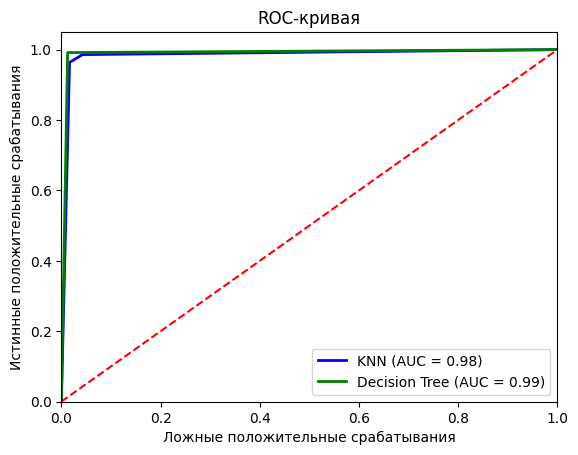

In [85]:
# Получим вероятности предсказаний
y_knn_prob = KNN.predict_proba(x_test)[:, 1]  # Вероятности для положительного класса
y_tree_prob = DECISION_TREE.predict_proba(x_test)[:, 1]

# вычислим ROC кривую
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_knn_prob)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_tree_prob)

# вычислим площадь под графиком ROC кривой (показатель AUC)
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_tree = auc(fpr_tree, tpr_tree)

# построим ROC кривую
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='KNN (AUC = {:.2f})'.format(roc_auc_knn))
plt.plot(fpr_tree, tpr_tree, color='green', lw=2, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_tree))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Линия случайного выбора
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложные положительные срабатывания')
plt.ylabel('Истинные положительные срабатывания')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

Если судить по графику ROC и значениям AUC, то обе модели работают практически идеально. Однако незначительно (0.99 > 0.98) выигрывает по точности дерева решений. Это можно обьяснить большим количество нелинейных зависимостей атрибута type, с определением которых дерево решений справляетсся лучше, чем метод KNN. В общем и целом, конечно показатели предсказаний моделей зашкаливающие, ввиду характера датасета, он специально создан для обучения, ввиду чего модели показали очень хороший результат. В реальности же, что кривые ROC, что метрики, я полагаю, будут отличаться в худшую сторону.

#### Метрика precision

Для модели KNN она составляет 0.97 для 1 и 0.98 для 0 соответственно. Для модели дерева решений 0.99 в обоих случаях. Метрика precision или же точность показывает долю верно предсказанных положительных(отрицательных) случаев к общему количеству предсказанных положительных(отрицательных) случаев. Исходя из полученных метрик, можно заключить, что модель дерева решений делает меньше ложных предсказаний и 1 и 0 по сравнению с KNN.

#### Метрика recall

Для модели KNN она составляет 0.98 и 0.96 для 0 и 1, для дерева 0.99 для обоих случаев. Метрика recall показывает как хорошо модель находит положительные(отрицательные) случаи. По этому параметру дерево решений опять обгоняет KNN.

#### Метрика F1

Для модели KNN она составляет 0.97 для обоих случаев, для дерева 0.99 для обоих случаев. Метрика F1 показывает сбалансированность между точностью и полнотой. Исходя из полученных данных модель дерева ведет себя более сбалансированно, чем KNN. 

Сравним модели по метрике accuracy, для этого подключим соответсвующую функцию из scikit-learn

In [86]:
from sklearn.metrics import accuracy_score

In [87]:
accuracy_knn = accuracy_score(y_test, y_knn_predicted)
accuracy_tree = accuracy_score(y_test, y_tree_predicted)

In [88]:
print("Accuracy для KNN:", accuracy_knn)
print("Accuracy для дерева решений:", accuracy_tree)

Accuracy для KNN: 0.9737015121630507
Accuracy для дерева решений: 0.9894806048652203


#### Метрика Accuracy

Метрика Accuracy определяет отношение верных предсказаний к общему числу предсказаний. Она легко интерпретируется и наглядно показывает точность модели. Сравнивая показатели этой метрики для модели KNN и дерева можно заключить, что дерево решений совершает больший процент верных предсказаний нежели KNN. 

#### Вывод

Проделав лабораторную работу я познакомился с алгоритмами классификации KNN и дерево решений, а так же изучил методы оценки качества обученных моделей. Обучив модели на данных об авокадо, я заметил что дерево решений для выбранного датасета лучше классифицирует натуральное авокадо и авокадо вырощенное в промышленных условиях. Это можно увидеть в метриках. Причину такого поведения алгоритма я описал в комментариях к анализу ROC кривой.